In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats 
from sklearn.feature_selection import SelectKBest, chi2
import matplotlib.ticker as mtick

In [26]:
customers_df = pd.read_csv("./customers.csv")

In [27]:
customers_df.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


In [29]:
customers_df.replace('None','NONE',inplace=True)

In [30]:
club_member_status_fashion_news_frequency_crosstab = pd.crosstab(customers_df['club_member_status'], customers_df['fashion_news_frequency'], margins = True)


In [31]:
print(club_member_status_fashion_news_frequency_crosstab)

fashion_news_frequency  Monthly    NONE  Regularly      All
club_member_status                                         
ACTIVE                      778  788484     471304  1260566
LEFT CLUB                     0     459          8      467
PRE-CREATE                   59   85065       5787    90911
All                         837  874008     477099  1351944


In [46]:
club_member_status_fashion_news_frequency_crosstab1 = pd.crosstab(customers_df['club_member_status'], customers_df['fashion_news_frequency'])

In [51]:
print(club_member_status_fashion_news_frequency_crosstab1)

fashion_news_frequency  Monthly    NONE  Regularly
club_member_status                                
ACTIVE                      778  788484     471304
LEFT CLUB                     0     459          8
PRE-CREATE                   59   85065       5787


<AxesSubplot:xlabel='club_member_status'>

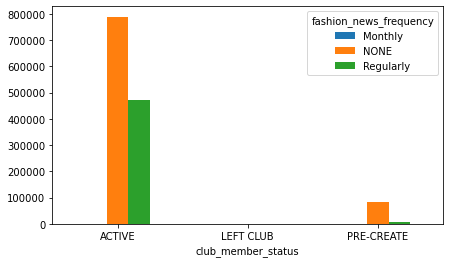

In [47]:
club_member_status_fashion_news_frequency_crosstab1.plot.bar(figsize=(7,4), rot= 0)


<Figure size 576x288 with 0 Axes>

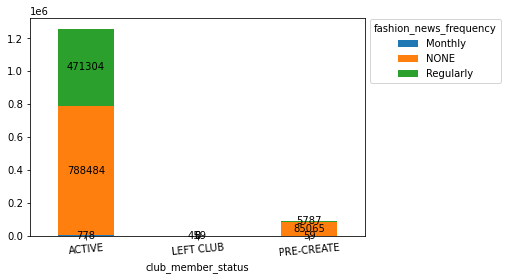

In [68]:
fig = plt.figure(figsize=(8,4))
ax = club_member_status_fashion_news_frequency_crosstab1.plot(kind='bar', stacked=True, rot=5)
ax.legend(title='fashion_news_frequency', bbox_to_anchor=(1, 1.02), loc='upper left')

# add annotations if desired
for c in ax.containers:
    
    # set the bar label
    ax.bar_label(c, label_type='center')

In [32]:
val = stats.chi2_contingency(club_member_status_fashion_news_frequency_crosstab)
val

(35977.33271023214,
 0.0,
 9,
 array([[7.80427105e+02, 8.14933731e+05, 4.44851842e+05, 1.26056600e+06],
        [2.89123662e-01, 3.01907280e+02, 1.64803596e+02, 4.67000000e+02],
        [5.62837714e+01, 5.87723613e+04, 3.20823549e+04, 9.09110000e+04],
        [8.37000000e+02, 8.74008000e+05, 4.77099000e+05, 1.35194400e+06]]))

In [33]:
def check_categorical_dependency(crosstab_table, confidence_interval):
    stat, p, dof, expected = stats.chi2_contingency(crosstab_table)
    print("Chi-square Statistic value = {}" .format(stat))
    print("P-Value = {}" .format(p))
    alpha = 1.0 - confidence_interval
    if p <= alpha :
        print('Dependent (reject H0),There is a relationship between 2 catgorical variables')
    else:
        print('Independent (fail to reject H0)，There is no relationship between 2 catgorical variables')
    return expected


In [34]:
exp_table_1 = check_categorical_dependency(club_member_status_fashion_news_frequency_crosstab, .95)

Chi-square Statistic value = 35977.33271023214
P-Value = 0.0
Dependent (reject H0),There is a relationship between 2 catgorical variables


In [36]:
pd.DataFrame(exp_table_1)

,0,1,2,3
0,780.427105,814933.731373,444851.841522,1260566.0
1,0.289124,301.907280,164.803596,467.0
2,56.283771,58772.361346,32082.354882,90911.0
3,837.000000,874008.000000,477099.000000,1351944.0
